# Projet de reconnaissance faciale

# Reconnaissance faciale avec TensorFlow

## Preparation des données

In [2]:
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from streamlit.web.cli import activate
from tensorflow.python.ops.metrics_impl import accuracy

# Dataset parameters
dataset_path = "dataset"
batch_size = 32
img_height = 224
img_width = 224

# Get all subdirectories in the dataset folder
class_names = tf.io.gfile.listdir(str(dataset_path))

# Prepare training and validation datasets
train_images = []
train_labels = []
val_images = []
val_labels = []

for label, class_name in enumerate(class_names):
    # Get image paths for this class
    image_paths = glob.glob(f"{dataset_path}/{class_name}/*.jpg")

    for i, image_path in enumerate(image_paths):
        # Load and preprocess image
        img = tf.keras.preprocessing.image.load_img(
            image_path, target_size=(img_height, img_width)
        )
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0

        # Split into train and validation
        if i < 3:
            train_images.append(img_array)
            train_labels.append(label)
        else:
            val_images.append(img_array)
            val_labels.append(label)

# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Convert labels to one-hot encoding
num_classes = len(class_names)
train_labels_onehot = np.eye(num_classes)[train_labels]
val_labels_onehot = np.eye(num_classes)[val_labels]

# Print class names
print("Classes:", class_names)

Classes: ['Angelina Jolie', 'Ben Afflek', 'Brad Pitt', 'Denzel Washington', 'Elton John', 'Hugh Jackman', 'Jennifer Lawrence', 'Jerry Seinfeld', 'Johnny Depp', 'Kate Winslet', 'Leonardo DiCaprio', 'Madonna', 'Mathis_Wauters', 'Megan Fox', 'Mindy Kaling', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']


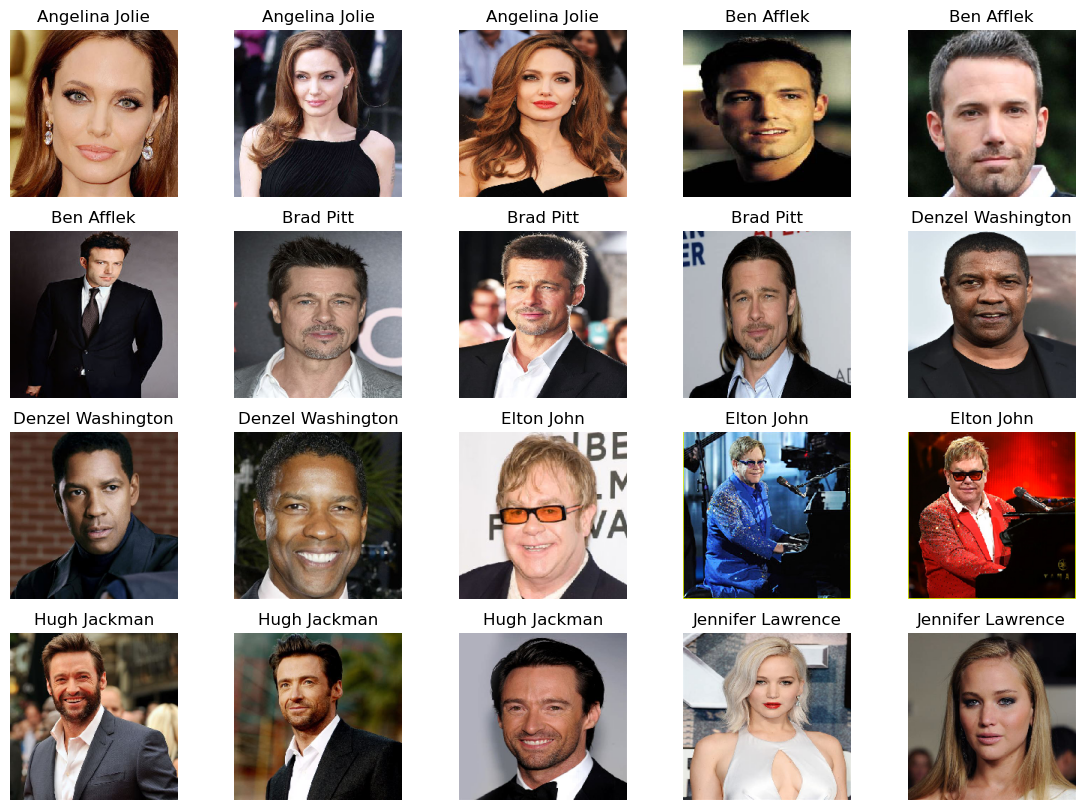

In [3]:
# Plot first 20 training images
plt.figure(figsize=(14, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.axis("off")
plt.show()

In [4]:
#import os
#import re
#
#import keras
#import numpy as np
#import tensorflow as tf
#from tensorflow.keras.preprocessing import image
#from tensorflow.python.layers.core import dropout
#
## Paramètres
#dataset_path = "dataset"
#batch_size = 32
#img_height = 224
#img_width = 224
#
## Fonction pour organiser les images par angles avec diagnostic
#def organize_images_by_angles(class_path):
#    angles = {
#        'face': [],
#        'left': [],
#        'right': [],
#        'up': [],
#        'down': []
#    }
#
#    for img_file in os.listdir(class_path):
#        # Extraire le numéro de l'image
#        try:
#            # Utiliser une expression régulière plus flexible
#            match = re.search(r'face_(\d+)', img_file)
#            if match:
#                num = int(match.group(1))
#                full_path = os.path.join(class_path, img_file)
#
#                if 0 <= num <= 4:
#                    angles['face'].append(full_path)
#                elif 5 <= num <= 9:
#                    angles['left'].append(full_path)
#                elif 10 <= num <= 14:
#                    angles['right'].append(full_path)
#                elif 15 <= num <= 19:
#                    angles['up'].append(full_path)
#                elif 20 <= num <= 24:
#                    angles['down'].append(full_path)
#        except (ValueError, TypeError):
#            # Ignorer les fichiers qui ne correspondent pas au motif
#            continue
#
#    return angles
#
## Récupérer les noms de classes
#class_names = os.listdir(dataset_path)
#class_names = [nom for nom in class_names if os.path.isdir(os.path.join(dataset_path, nom))]
#
## Préparation des données
#images = []
#labels = []
#image_paths = []
#
#for classe, nom in enumerate(class_names):
#    class_path = os.path.join(dataset_path, nom)
#
#    # Organiser les images par angles
#    angles_images = organize_images_by_angles(class_path)
#
#    # Vérifier que chaque catégorie a des images
#    val_images = []
#    for angle in ['face', 'left', 'right', 'up', 'down']:
#        if angles_images[angle]:
#            val_images.append(np.random.choice(angles_images[angle], 1)[0])
#        else:
#            print(f"ATTENTION : Pas d'image pour l'angle {angle} dans {nom}")
#
#    # Vérifier qu'on a bien des images de validation
#    if not val_images:
#        print(f"ERREUR : Aucune image de validation pour {nom}")
#        continue  # Passer à la classe suivante
#
#    # Charger les images de validation
#    for val_path in val_images:
#        try:
#            img = image.load_img(val_path, target_size=(img_height, img_width))
#            img_array = image.img_to_array(img)
#
#            images.append(img_array)
#            labels.append(classe)
#            image_paths.append(val_path)
#        except Exception as e:
#            print(f"Erreur lors du chargement de l'image {val_path}: {e}")
#
#    # Charger les images d'entraînement (les autres)
#    train_images = [
#        path for angle_list in angles_images.values() for path in angle_list
#        if path not in val_images
#    ]
#
#    for train_path in train_images:
#        try:
#            img = image.load_img(train_path, target_size=(img_height, img_width))
#            img_array = image.img_to_array(img)
#
#            images.append(img_array)
#            labels.append(classe)
#            image_paths.append(train_path)
#        except Exception as e:
#            print(f"Erreur lors du chargement de l'image {train_path}: {e}")
#
## Convertir en numpy arrays
#images = np.array(images)
#labels = np.array(labels)
#image_paths = np.array(image_paths)
#
## Normalisation
#normalization_layer = tf.keras.layers.Rescaling(1./255)
#
## Création des datasets TensorFlow
#train_dataset = tf.data.Dataset.from_tensor_slices((images, labels))
#train_dataset = (train_dataset
#    .batch(batch_size)
#    .map(lambda x, y: (normalization_layer(x), y))
#    .prefetch(tf.data.AUTOTUNE)
#)
#
## Créer le dataset de validation en prenant 1 image sur 6 (les images de validation)
#val_images = images[::6]
#val_labels = labels[::6]
#
#val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
#val_dataset = (val_dataset
#    .batch(batch_size)
#    .map(lambda x, y: (normalization_layer(x), y))
#    .prefetch(tf.data.AUTOTUNE)
#)
#
## Afficher les fichiers de validation
#print("\nFichiers de validation :")
#for classe in range(len(class_names)):
#    print(f"\nClasse {class_names[classe]} :")
#    classe_val_paths = image_paths[(labels == classe) & (np.array([path in image_paths[labels == classe][0:5] for path in image_paths]))]
#    for path in classe_val_paths:
#        print(os.path.basename(path))
#
## Autres informations de distribution
#print("\nNoms des classes:", class_names)
#print("Nombre total d'images:", len(images))
#print("Nombre d'images par classe:", len(images) // len(class_names))
#print("\nNombre d'images d'entraînement:", len(train_dataset) * batch_size)
#print("Nombre d'images de validation:", len(val_dataset) * batch_size)

## Définir le modèle

In [5]:
#from tensorflow.keras import layers, models
#from tensorflow.keras.applications import MobileNetV2
#
## Charger MobileNetV2 sans la dernière couche
#base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
#                         include_top=False,
#                         weights='imagenet')
#
## Geler les couches du modèle pré-entraîné
#base_model.trainable = False
#
## Ajouter des couches personnalisées
#model = models.Sequential()
#model.add(base_model)
#model.add(layers.GlobalAveragePooling2D())
#model.add(layers.Dense(num_classes, activation='softmax'))
#
## Compiler le modèle
#model.compile(optimizer='Adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy']),
#
## Résumé du modèle
#model.summary()

In [6]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Charger MobileNetV2 sans la dernière couche
base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                         include_top=False,
                         weights='imagenet')

# Geler les couches du modèle pré-entraîné
base_model.trainable = False

# Ajouter des couches personnalisées
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes))

# Compiler le modèle
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']),

# Résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 23)             │        29,463 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,287,447 (8.73 MB)

 Trainable params: 29,463 (115.09 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Data augmentation et entraînement du modèle

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Préparer les générateurs de données
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)
val_generator = train_datagen.flow(val_images, val_labels, batch_size=batch_size)

# Entraîner le modèle
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=15)

C:\Users\waute\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/14
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.0072 - loss: 3.4480 - val_accuracy: 0.0652 - val_loss: 3.2668
Epoch 2/14
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step - accuracy: 0.1852 - loss: 3.0392 - val_accuracy: 0.1304 - val_loss: 3.1209
Epoch 3/14
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1712 - loss: 2.8430 - val_accuracy: 0.1087 - val_loss: 2.9502
Epoch 4/14
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3200 - loss: 2.4620 - val_accuracy: 0.1739 - val_loss: 2.8111
Epoch 5/14
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4258 - loss: 2.2065 - val_accuracy: 0.1957 - val_loss: 2.7859
Epoch 6/14
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5183 - loss: 1.8258 - val_accuracy: 0.3043 - val_loss: 2.6065
Epoch 7/14
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 887ms/step - accuracy: 0.4705 - loss: 2.0049 - val_accuracy: 0.2609 - val_loss: 2.5758
Epoch 8/14
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 781ms/step - accuracy: 0.5789 - loss: 1.7600 - val_accuracy: 0.2826 - val_loss: 2.4771
Epoch 9

## Visualisation des résultats

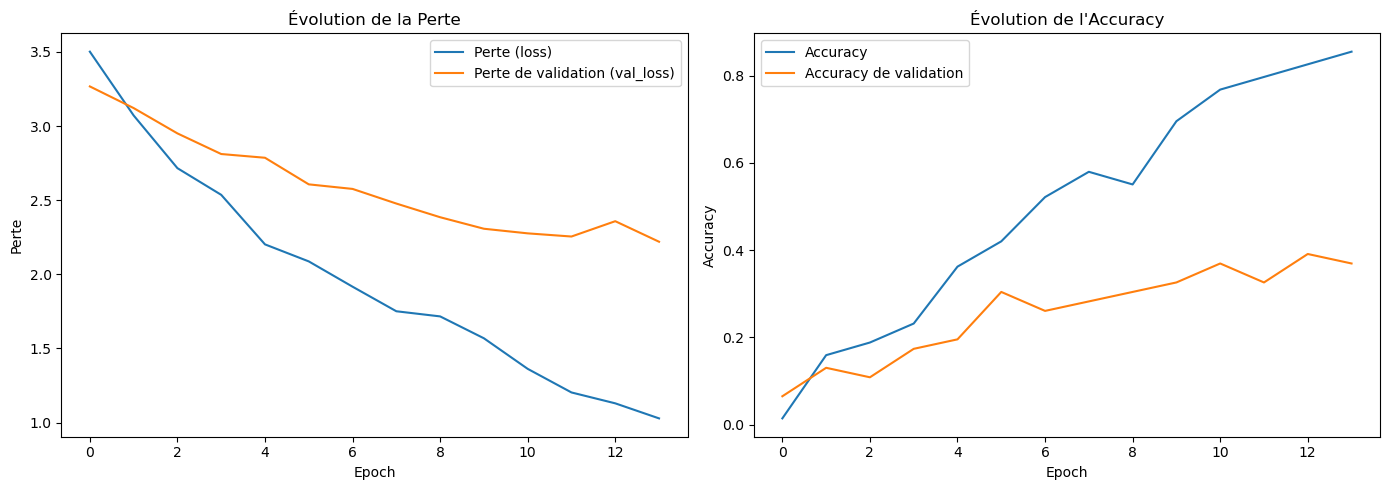

Final training accuracy: 0.8551


In [8]:
# Visualisation des résultats
import matplotlib.pyplot as plt

# Afficher la perte et l'accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte (loss)')
plt.plot(history.history['val_loss'], label='Perte de validation (val_loss)')
plt.title('Évolution de la Perte')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()

# Afficher l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Accuracy de validation')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print the final accuracy
final_accuracy = history.history['accuracy'][-1]
print(f"Final training accuracy: {final_accuracy:.4f}")

## Évaluer le modèle et ajuster les hyperparamètres

In [9]:
model.save("face_recognition_model.keras")

In [10]:
import cv2
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import os
import tkinter as tk
from tkinter import Tk, Label
from tkinter import simpledialog
from tkinter import messagebox
from scipy.special import expit

# Charger le modèle sauvegardé
model = tf.keras.models.load_model("face_recognition_model.keras")
class_names = tf.io.gfile.listdir(str('dataset'))

# Seuil de confiance pour détecter les visages inconnus
confidence_threshold = 0.6  # Ajustez ce seuil selon vos besoins

# Initialiser le classificateur de visage d'OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Dimensions des images attendues
img_height = 224
img_width = 224

# Fonction pour effectuer une prédiction
def predict_face(face, model, class_names, threshold=0.6):
    """
    Prédit la classe d'un visage et vérifie s'il est inconnu.
    Args:
        face: Image du visage.
        model: Modèle de reconnaissance faciale.
        class_names: Liste des noms de classes.
        threshold: Seuil de confiance pour les visages inconnus.

    Returns:
        predicted_class: Nom de la classe prédite ou 'Inconnu'.
        confidence: Confiance de la prédiction.
    """
    face = cv2.resize(face, (img_width, img_height))  # Redimensionner
    face_array = img_to_array(face) / 255.0  # Normaliser
    face_array = np.expand_dims(face_array, axis=0)  # Ajouter une dimension batch

    # Obtenir les prédictions (logits)
    predictions = model.predict(face_array)[0]  # Sortie du modèle
    probabilities = expit(predictions)  # Appliquer la sigmoïde sur les logits

    # Obtenir la classe avec la probabilité maximale
    max_index = np.argmax(probabilities)
    confidence = probabilities[max_index]

    # Vérifier si le visage est inconnu
    if confidence < threshold:
        return "Inconnu", confidence
    else:
        predicted_class = class_names[max_index]
        return predicted_class, confidence

def show_message(message, duration=5):
    """
    Affiche un message dans une fenêtre pendant une durée spécifiée.
    """
    root = Tk()
    root.title("Prochaine étape")
    root.geometry("300x100")
    label = Label(root, text=message, font=("Helvetica", 16), wraplength=280)
    label.pack(expand=True)
    root.after(duration * 1000, root.destroy)  # Ferme la fenêtre après `duration` secondes
    root.mainloop()

def capture_face(prenom, nom):
    # Créer le dossier pour enregistrer les images si il n'existe pas
    folder_name = f"dataset/{prenom}_{nom}"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Ouvrir la caméra
    cap = cv2.VideoCapture(0)
    captured_images = 0
    directions = ["Regardez en face", "Regardez en haut", "Regardez à droit", "Regardez en bas", "Regardez à gauche"]
    images_per_direction = 1  # Nombre d'images par direction
    total_images = len(directions) * images_per_direction

    direction_index = 0

    while captured_images < total_images:
        # Afficher le texte de l'étape actuelle
        current_direction = directions[direction_index]
        print(f"Etape : {current_direction}")

        # Pause de 3 secondes avec affichage de l'étape actuelle
        for i in range(3, 0, -1):
            ret, frame = cap.read()
            if not ret:
                break
            # Ajouter le texte pour guider l'utilisateur
            cv2.putText(frame, f"{current_direction} dans {i} secondes",
                        (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
            cv2.imshow('Capturer le visage', frame)
            cv2.waitKey(1000)

        while captured_images < (direction_index + 1) * images_per_direction:
            ret, frame = cap.read()
            if not ret:
                break

            # Convertir en niveaux de gris pour la détection
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Détection des visages
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            for (x, y, w, h) in faces:
                # Élargir la zone pour prendre toute la tête
                x_head = max(0, x - int(0.2 * w))  # 20% de plus sur les côtés
                y_head = max(0, y - int(0.3 * h))  # 30% de plus en haut pour inclure plus de tête
                w_head = min(frame.shape[1] - x_head, int(w * 1.4))  # Largeur augmentée
                h_head = min(frame.shape[0] - y_head, int(h * 1.6))  # Hauteur augmentée

                # Extraire toute la tête
                head = frame[y_head:y_head+h_head, x_head:x_head+w_head]

                # Enregistrer l'image
                head_filename = f"{folder_name}/head_{captured_images}.jpg"
                cv2.imwrite(head_filename, head)
                captured_images += 1

                # Ajouter un rectangle et des informations à l'écran
                cv2.putText(frame, f"Image {captured_images}/{total_images}",
                            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                cv2.rectangle(frame, (x_head, y_head), (x_head+w_head, y_head+h_head), (0, 255, 0), 2)

            # Afficher l'étape actuelle pendant la capture
            cv2.putText(frame, f"Etape actuelle : {current_direction}",
                        (10, frame.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)

            # Afficher le flux vidéo avec les visages détectés
            cv2.imshow('Capturer le visage', frame)

            # Quitter avec la touche 'q'
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cap.release()
                cv2.destroyAllWindows()
                return

        # Passer à la prochaine direction
        direction_index = (direction_index + 1) % len(directions)

    # Libérer les ressources
    cap.release()
    cv2.destroyAllWindows()
    show_message(f"Enregistrement terminé. Les visages ont été enregistrés dans le dossier : {folder_name}")

# Fonction pour analyser les visages
def analyze_face():
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir en niveaux de gris pour la détection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Détection des visages
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Élargir la zone pour capturer toute la tête (même logique que dans `capture_face`)
            x_head = max(0, x - int(0.2 * w))  # 20% de plus sur les côtés
            y_head = max(0, y - int(0.3 * h))  # 30% de plus en haut
            w_head = min(frame.shape[1] - x_head, int(w * 1.4))  # Largeur augmentée
            h_head = min(frame.shape[0] - y_head, int(h * 1.6))  # Hauteur augmentée

            # Extraire toute la tête
            head = frame[y_head:y_head+h_head, x_head:x_head+w_head]

            # Prédire la classe et la confiance
            predicted_class, confidence = predict_face(head, model, class_names)

            if confidence < confidence_threshold:
                text = "Visage Inconnu"
                color = (0, 0, 255)  # Rouge pour inconnu
            else:
                text = f"{predicted_class} ({confidence:.2f})"
                color = (0, 255, 0)  # Vert pour reconnu

            # Dessiner le rectangle et le texte
            cv2.rectangle(frame, (x_head, y_head), (x_head+w_head, y_head+h_head), color, 2)
            cv2.putText(frame, text, (x_head, y_head - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        cv2.imshow('Reconnaissance Faciale', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


# Interface graphique
def create_interface():
    # Fenêtre principale
    window = tk.Tk()
    window.title("Reconnaissance Faciale")

    # Fonction pour enregistrer un visage
    def start_capture():
        prenom = simpledialog.askstring("Prénom", "Entrez votre prénom:")
        nom = simpledialog.askstring("Nom", "Entrez votre nom:")
        if prenom and nom:
            capture_face(prenom, nom)

    # Fonction pour analyser les visages
    def start_analyze():
        analyze_face()

    # Boutons pour chaque fonctionnalité
    capture_button = tk.Button(window, text="Enregistrer un visage", command=start_capture)
    capture_button.pack(pady=10)

    analyze_button = tk.Button(window, text="Analyser un visage", command=start_analyze)
    analyze_button.pack(pady=10)

    # Lancer l'interface
    window.mainloop()

# Lancer l'interface
create_interface()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━

## Reconnaissance faciale en temps réel

In [11]:
#import cv2
#import time
#import numpy as np
#import tensorflow as tf
#from tensorflow.keras.utils import img_to_array
#import os
#import tkinter as tk
#from tkinter import Tk, Label
#from tkinter import simpledialog
#from tkinter import messagebox
#
## Charger le modèle sauvegardé
#model = tf.keras.models.load_model("face_recognition_model.keras")
#class_names = tf.io.gfile.listdir(str('dataset'))
#
## Initialiser le classificateur de visage d'OpenCV
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#
## Dimensions des images attendues
#img_height = 224
#img_width = 224
#
## Fonction pour effectuer une prédiction
#def predict_face(face, model, class_names):
#    face = cv2.resize(face, (img_width, img_height))  # Redimensionner
#    face_array = img_to_array(face) / 255.0  # Normaliser
#    face_array = np.expand_dims(face_array, axis=0)  # Ajouter une dimension batch
#    predictions = model.predict(face_array)
#    predicted_class = class_names[np.argmax(predictions)]
#    confidence = np.max(predictions)
#    return predicted_class, confidence
#
#def show_message(message, duration=5):
#    """
#    Affiche un message dans une fenêtre pendant une durée spécifiée.
#    """
#    root = Tk()
#    root.title("Prochaine étape")
#    root.geometry("300x100")
#    label = Label(root, text=message, font=("Helvetica", 16), wraplength=280)
#    label.pack(expand=True)
#    root.after(duration * 1000, root.destroy)  # Ferme la fenêtre après `duration` secondes
#    root.mainloop()
#
#def capture_face(prenom, nom):
#    # Créer le dossier pour enregistrer les images si il n'existe pas
#    folder_name = f"dataset/{prenom}_{nom}"
#    if not os.path.exists(folder_name):
#        os.makedirs(folder_name)
#
#    # Ouvrir la caméra
#    cap = cv2.VideoCapture(0)
#    captured_images = 0
#    directions = ["Regardez a gauche", "Regardez a droite", "Regardez vers le haut", "Regardez vers le bas", "Regardez droit devant"]
#    images_per_direction = 1  # Nombre d'images par direction
#    total_images = len(directions) * images_per_direction
#
#    direction_index = 0
#
#    while captured_images < total_images:
#        # Afficher le texte de l'étape actuelle
#        current_direction = directions[direction_index]
#        print(f"Etape : {current_direction}")
#
#        # Pause de 3 secondes avec affichage de l'étape actuelle
#        for i in range(3, 0, -1):
#            ret, frame = cap.read()
#            if not ret:
#                break
#            # Ajouter le texte pour guider l'utilisateur
#            cv2.putText(frame, f"{current_direction} dans {i} secondes",
#                        (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
#            cv2.imshow('Capturer le visage', frame)
#            cv2.waitKey(1000)
#
#        while captured_images < (direction_index + 1) * images_per_direction:
#            ret, frame = cap.read()
#            if not ret:
#                break
#
#            # Convertir en niveaux de gris pour la détection
#            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#
#            # Détection des visages
#            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
#
#            for (x, y, w, h) in faces:
#                # Extraire le visage
#                face = frame[y:y+h, x:x+w]
#
#                # Enregistrer l'image
#                face_filename = f"{folder_name}/face_{captured_images}.jpg"
#                cv2.imwrite(face_filename, face)
#                captured_images += 1
#
#                # Ajouter un rectangle et des informations à l'écran
#                cv2.putText(frame, f"Image {captured_images}/{total_images}",
#                            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#
#            # Afficher l'étape actuelle pendant la capture
#            cv2.putText(frame, f"Etape actuelle : {current_direction}",
#                        (10, frame.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
#
#            # Afficher le flux vidéo avec les visages détectés
#            cv2.imshow('Capturer le visage', frame)
#
#            # Quitter avec la touche 'q'
#            if cv2.waitKey(1) & 0xFF == ord('q'):
#                cap.release()
#                cv2.destroyAllWindows()
#                return
#
#        # Passer à la prochaine direction
#        direction_index = (direction_index + 1) % len(directions)
#
#    # Libérer les ressources
#    cap.release()
#    cv2.destroyAllWindows()
#    show_message(f"Enregistrement terminé. Les visages ont été enregistrés dans le dossier : {folder_name}")
#
## Fonction pour analyser les visages
#def analyze_face():
#    cap = cv2.VideoCapture(0)
#
#    # Dictionnaire pour stocker les données des visages détectés
#    face_data = {}  # Clé : ID de visage, Valeur : {classe, score de confiance}
#
#    while True:
#        ret, frame = cap.read()
#        if not ret:
#            break
#
#        # Convertir en niveaux de gris pour la détection
#        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#
#        # Détection des visages
#        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
#
#        # Mettre à jour les données des visages
#        new_face_data = {}
#        for i, (x, y, w, h) in enumerate(faces):
#            face_id = f"face_{i}"  # ID unique pour chaque visage détecté
#            face = frame[y:y+h, x:x+w]
#
#            # Prédire la classe et la confiance pour le visage actuel
#            predicted_class, confidence = predict_face(face, model, class_names)
#
#            # Si le visage est nouveau ou si la confiance est meilleure, mettre à jour
#            if face_id not in face_data or confidence > face_data[face_id]['confidence']:
#                new_face_data[face_id] = {'class': predicted_class, 'confidence': confidence}
#            else:
#                # Sinon, conserver les données précédentes
#                new_face_data[face_id] = face_data[face_id]
#
#            # Dessiner un rectangle autour du visage et ajouter le texte
#            color = (0, 255, 0)  # Vert pour le rectangle
#            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
#            text = f"{new_face_data[face_id]['class']} ({new_face_data[face_id]['confidence']:.2f})"
#            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
#
#        # Mettre à jour les données des visages
#        face_data = new_face_data
#
#        # Afficher le flux vidéo avec les prédictions
#        cv2.imshow('Reconnaissance Faciale', frame)
#
#        # Quitter avec la touche 'q'
#        if cv2.waitKey(1) & 0xFF == ord('q'):
#            break
#
#    # Libérer les ressources
#    cap.release()
#    cv2.destroyAllWindows()
#
## Interface graphique avec Tkinter
#def create_interface():
#    # Fenêtre principale
#    window = tk.Tk()
#    window.title("Reconnaissance Faciale")
#
#    # Fonction pour enregistrer un visage
#    def start_capture():
#        prenom = simpledialog.askstring("Prénom", "Entrez votre prénom:")
#        nom = simpledialog.askstring("Nom", "Entrez votre nom:")
#        if prenom and nom:
#            capture_face(prenom, nom)
#
#    # Fonction pour analyser les visages
#    def start_analyze():
#        analyze_face()
#
#    # Boutons pour chaque fonctionnalité
#    capture_button = tk.Button(window, text="Enregistrer un visage", command=start_capture)
#    capture_button.pack(pady=10)
#
#    analyze_button = tk.Button(window, text="Analyser un visage", command=start_analyze)
#    analyze_button.pack(pady=10)
#
#    # Lancer l'interface
#    window.mainloop()
#
## Lancer l'interface graphique
#create_interface()
#